# Top 2000 analyse

Wat funfacts op basis van de top 2000 uit 2016.

## Hoe vaak voorgekomen per jaar
Onderstaande grafiek laat zien hoeveel nummers er per jaar in de top 2000 van 2016 zitten. 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# plot graph
def plot_graph(x, y, label):
    plt.title("Top 2000")
    plt.xlabel("Tijd (jaren)")
    plt.ylabel(label)
    plt.bar(x, y, width=0.5)
    plt.show()

# read top2000.csv
with open("top2016.csv") as f:
    text = f.readlines()
    
# fill top2000filled.csv
with open("top2000fixed.csv", "w") as f:
    for i in range(len(text)):
        f.write(text[i][0:len(text[i]) - 7])
        f.write("\n")
        
# read data
data = pd.read_csv("top2000fixed.csv")
d = {}

# iterate over data
for year in data["jaar"]:
    if year in d:
        d[year] += 1
    else:
        d[year] = 1
        
# fill x values
x_vals = []
for year in range(min(d), max(d) + 1):
    x_vals.append(year)
    
# fill y values
y_vals = []
for i in x_vals:
    if i in d.keys():
        y_vals.append(d[i])
    else:
        y_vals.append(0)

plot_graph(x_vals, y_vals, "Hoevaak voorgekomen")

counter = 0
for i in data["jaar"]:
    if i >= 2000:
        counter += 1

print("%.1f procent uit de top 2000 komt van na de milleniumwissel." % (counter / 2000 * 100))

26.0 procent uit de top 2000 komt van na de milleniumwissel.


## Score per jaar
Onderstaande grafiek laat de score per jaar uit de top 2000 zien. 

De score wordt berekent door de volgende formule: 2001 - positie in de top 2000. De score laat zien dat niet alle nummers die hoog scoren uit de jaren tachtig komen.

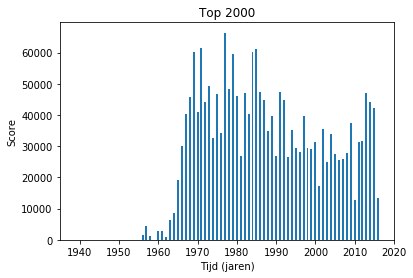

In [2]:
# create dictionary
d = {}

# iterate over data
for i in range(len(data["jaar"])):
    if data["jaar"][i] in d:
        d[data["jaar"][i]] += 2001 - data["pos"][i]
    else:
        d[data["jaar"][i]] = 2001 - data["pos"][i]

# fill y values
ys_vals = []
for i in x_vals:
    if i in d.keys():
        ys_vals.append(d[i])
    else:
        ys_vals.append(0)

plot_graph(x_vals, ys_vals, "Score")

## Score vergeleken met hoe vaak voorgekomen
Onderstaande grafiek laat het verschil in percentage tussen de score en hoe vaak voorgekomen zien. Een negatief verschil betekent dat de het percentage score lager is dan het percentage voorgekomen nummers in de top 2000.

Het verschil tussen de behaalde score en het aantal voorgekomen nummers per jaar blijkt over het algemeen wel enigszins te fluctueren, maar niet heel drastisch. Met uitzondering van het jaar 1939, waarvan enkel het nummer Strange Fruit van Billie Holiday in de top 2000 staat. Dit nummer staat op plek 1989 in de top 2000 en heeft dus een score van 12.

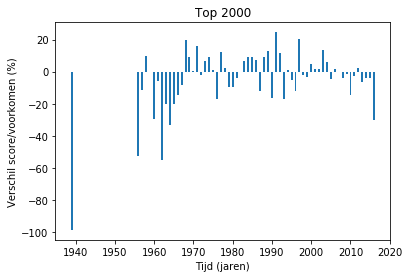

In [3]:
yc_vals = [((ys_vals[i] / 1000) - y_vals[i]) / y_vals[i] * 100 if y_vals[i] > 0 else 0 for i in range(len(y_vals))]
plot_graph(x_vals, yc_vals, "Verschil score/voorkomen (%)")

## Vaakst voorkomende artiesten
Onderstaande lijst laat zien welke artiesten het meest in de top 2000 voorkomen.


In [4]:
# create dictionary
artists = {}

# iterate over data
for i in data["artiest"]:
    if i in artists:
        artists[i] += 1
    else:
        artists[i] = 1

top_artists = []
number_of_songs = []
n = 25

for i in range(n):
    highest = ""
    maximum = 0
    
    for j in artists:
        if artists[j] > maximum:
            highest = j
            maximum = artists[j]
    
    top_artists.append(highest)
    number_of_songs.append(maximum)
    del artists[highest]
    
for i in range(n):
    print("%s%s: %d" % (top_artists[i], (40 - len(top_artists[i])) * " ", number_of_songs[i]))

The Beatles                             : 38
The Rolling Stones                      : 26
Queen                                   : 25
Coldplay                                : 23
U2                                      : 23
David Bowie                             : 22
Michael Jackson                         : 22
Bruce Springsteen                       : 21
ABBA                                    : 21
Bløf                                    : 16
Fleetwood Mac                           : 16
Prince                                  : 15
Elvis Presley                           : 14
Marco Borsato                           : 13
De Dijk                                 : 13
Muse                                    : 13
Anouk                                   : 12
Pink Floyd                              : 12
Bee Gees                                : 12
Dire Straits                            : 12
Adele                                   : 12
Eagles                                  : 11
The Doors 

## Funfacts
Onderstaande code print enkele funfacts uit de top 2000.

In [5]:
def gemiddelde(l, text):
    total_length = 0
    for i in data[l]:
        total_length += len(i)
    print("Gemiddelde", text, ":", total_length / len(data[l]), "\n")

# gemiddelde lengte naam artiest
gemiddelde("artiest", "lengte naam artiest")

# gemiddelde lengte nummer
gemiddelde("titel", "titel lengte")

# meest voorkomende eerste letter
d = {}
for i in data["titel"]:
    if i[:1] in d:
        d[i[:1]] += 1
    else:
        d[i[:1]] = 1

hfreq = max(max(d, key=d.get))
print(hfreq, "is de meest voorkomende eerste letter bij nummers in de top 2000, met een voorkomen van", d[hfreq], "keer\n")

# hoeveel nummers bestaan uit meerdere woorden
counter = 0
for i in data["titel"]:
    if " " in i:
        counter += 1

print(counter, "nummers bestaan uit meer dan 1 woord\n")

# hoeveel nummers bevatten het woord the
counter = 0
for i in data["titel"]:
    if "the" in i or "The" in i:
        counter += 1

print(counter, "nummers bevatten het woord 'the'\n")

# hoeveel nummers bestaan uit 3 of minder letters
counter = 0
for i in data["titel"]:
    if len(i) <= 3:
        counter += 1

print(counter, "nummers bestaan uit drie of minder letters\n")

# wat is de titel die het meest voorkomt en hoe vaak
d = {}
for i in data["titel"]:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1

most_used = max(d.values())
for i in d:
    if d[i] == 4:
        print(i, "is de meest voorkomende titel in de top 2000. Deze is", most_used, "keer gebruikt\n")

# wat is de langste titel van een nummer dat voorkomt en van wie
max_len = 0
title = ""
artist = ""
place = 0

for i in range(len(data["titel"])):
    if len(data["titel"][i]) > max_len:
        max_len = len(data["titel"][i])
        title = data["titel"][i]
        artist = data["artiest"][i]
        place = data["pos"][i]

print(title, "van", artist, "is het nummer in de top 2000 met de langste naam, bestaande uit", max_len, "tekens!",
     "Het nummer staat op plek", place, "\n")
        
# hoeveel verschillende woorden worden er in deze 2000 nummers gebruikt (in titel)
d = {}
for i in data["titel"]:
    to_lower = i.lower()
    fix = to_lower.replace(",", "").replace("!", "").replace("(", "").replace(")", "").replace("/", "").replace("?", "")
    words = fix.split()
    for j in words:
        if j in d:
            d[j] += 1
        else:
            d[j] = 1

print(len(d), "verschillende woorden gebruikt in de 2000 titels. Of er is bijzonder veel overkomst, of er is een bug in mijn code\n")

Gemiddelde lengte naam artiest : 11.5885 

Gemiddelde titel lengte : 14.8495 

S is de meest voorkomende eerste letter bij nummers in de top 2000, met een voorkomen van 213 keer

1580 nummers bestaan uit meer dan 1 woord

301 nummers bevatten het woord 'the'

24 nummers bestaan uit drie of minder letters

Crazy is de meest voorkomende titel in de top 2000. Deze is 4 keer gebruikt

If You Tolerate This Your Children Will Be Next van Manic Street Preachers is het nummer in de top 2000 met de langste naam, bestaande uit 47 tekens! Het nummer staat op plek 747 

2117 verschillende woorden gebruikt in de 2000 titels. Of er is bijzonder veel overkomst, of er is een bug in mijn code

